In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shirokiy
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | kamogawa
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | aketi
Processing Record 11 of Set 1 | biak
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | indramayu
Processing Record 15 of Set 1 | pervomayskoye
Processing Record 16 of Set 1 | doka
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of S

Processing Record 34 of Set 4 | codrington
Processing Record 35 of Set 4 | visby
Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | sabha
Processing Record 38 of Set 4 | pangai
Processing Record 39 of Set 4 | mikhaylovka
Processing Record 40 of Set 4 | nouadhibou
Processing Record 41 of Set 4 | ermelo
Processing Record 42 of Set 4 | umm lajj
Processing Record 43 of Set 4 | sampit
Processing Record 44 of Set 4 | kinkala
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | oistins
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | arroyo
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | shetpe
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | vestmanna
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | tetouan
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 

Processing Record 29 of Set 8 | tigre
Processing Record 30 of Set 8 | jega
Processing Record 31 of Set 8 | bronnoysund
Processing Record 32 of Set 8 | high rock
Processing Record 33 of Set 8 | southbridge
Processing Record 34 of Set 8 | sapao
City not found. Skipping...
Processing Record 35 of Set 8 | khandyga
Processing Record 36 of Set 8 | suphan buri
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | muros
Processing Record 39 of Set 8 | ribas do rio pardo
Processing Record 40 of Set 8 | banda aceh
Processing Record 41 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 8 | sabang
Processing Record 43 of Set 8 | barabai
Processing Record 44 of Set 8 | grootfontein
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | jalu
Processing Record 48 of Set 8 | korla
Processing Record 49 of Set 8 | alihe
Processing Record 50 of Set 8 | sao gabriel da cachoeira
Processing Record 1 of S

Processing Record 16 of Set 12 | cap malheureux
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | okato
Processing Record 19 of Set 12 | trelew
Processing Record 20 of Set 12 | zharkent
Processing Record 21 of Set 12 | sechura
Processing Record 22 of Set 12 | karratha
Processing Record 23 of Set 12 | cherkasskoye
Processing Record 24 of Set 12 | grants
Processing Record 25 of Set 12 | ustyuzhna
Processing Record 26 of Set 12 | chulman
Processing Record 27 of Set 12 | johi
Processing Record 28 of Set 12 | randfontein
Processing Record 29 of Set 12 | clausthal-zellerfeld
Processing Record 30 of Set 12 | morehead
Processing Record 31 of Set 12 | isangel
Processing Record 32 of Set 12 | mrirt
City not found. Skipping...
Processing Record 33 of Set 12 | moree
Processing Record 34 of Set 12 | yeppoon
Processing Record 35 of Set 12 | rocha
Processing Record 36 of Set 12 | olinda
Processing Record 37 of Set 12 | sidrolandia
Processing Record 38 of Set 12 | mayskiy

In [7]:
len(city_data)

580

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shirokiy,49.7580,129.5230,51.19,93,30,6.64,RU,2022-08-08 19:36:29
1,Mataura,-46.1927,168.8643,34.48,82,8,6.26,NZ,2022-08-08 19:36:30
2,Kamogawa,35.1000,140.1000,82.13,87,100,16.87,JP,2022-08-08 19:36:30
3,Busselton,-33.6500,115.3333,47.93,84,96,13.73,AU,2022-08-08 19:36:31
4,Kununurra,-15.7667,128.7333,66.18,88,0,4.61,AU,2022-08-08 19:36:14
5,Saldanha,-33.0117,17.9442,51.85,82,100,8.16,ZA,2022-08-08 19:36:32
6,Aketi,2.7388,23.7833,71.28,90,85,1.43,CD,2022-08-08 19:36:32
7,Biak,-0.9131,122.8766,75.04,85,87,4.61,ID,2022-08-08 19:36:32
8,Jamestown,42.0970,-79.2353,84.94,65,100,14.97,US,2022-08-08 19:33:55
9,Tuktoyaktuk,69.4541,-133.0374,59.00,72,75,18.41,CA,2022-08-08 19:36:33


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shirokiy,RU,2022-08-08 19:36:29,49.7580,129.5230,51.19,93,30,6.64
1,Mataura,NZ,2022-08-08 19:36:30,-46.1927,168.8643,34.48,82,8,6.26
2,Kamogawa,JP,2022-08-08 19:36:30,35.1000,140.1000,82.13,87,100,16.87
3,Busselton,AU,2022-08-08 19:36:31,-33.6500,115.3333,47.93,84,96,13.73
4,Kununurra,AU,2022-08-08 19:36:14,-15.7667,128.7333,66.18,88,0,4.61
5,Saldanha,ZA,2022-08-08 19:36:32,-33.0117,17.9442,51.85,82,100,8.16
6,Aketi,CD,2022-08-08 19:36:32,2.7388,23.7833,71.28,90,85,1.43
7,Biak,ID,2022-08-08 19:36:32,-0.9131,122.8766,75.04,85,87,4.61
8,Jamestown,US,2022-08-08 19:33:55,42.0970,-79.2353,84.94,65,100,14.97
9,Tuktoyaktuk,CA,2022-08-08 19:36:33,69.4541,-133.0374,59.00,72,75,18.41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import time module
import time

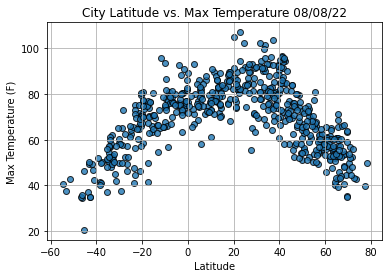

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

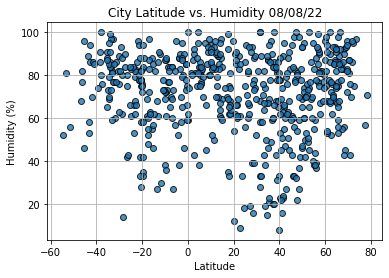

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

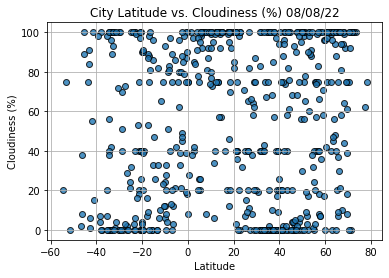

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

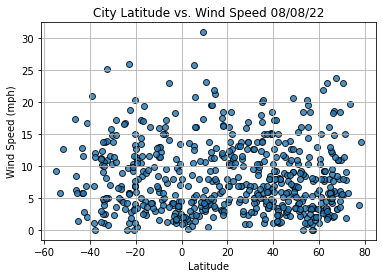

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

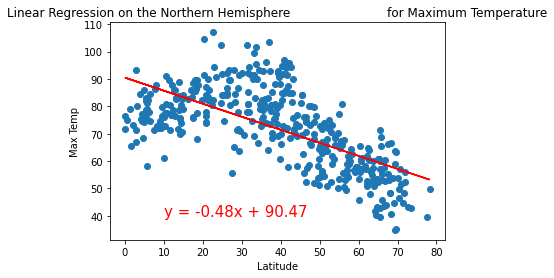

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


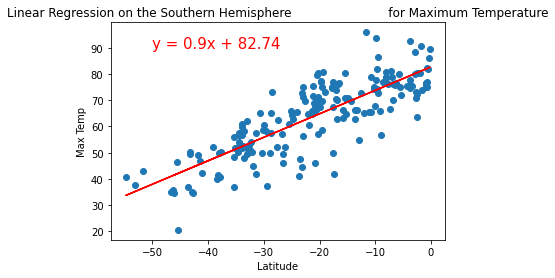

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

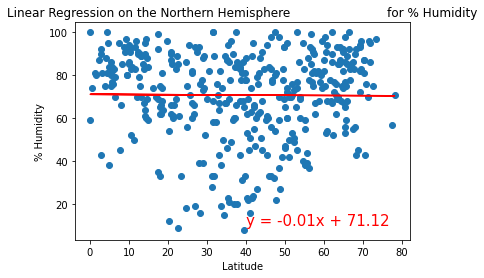

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

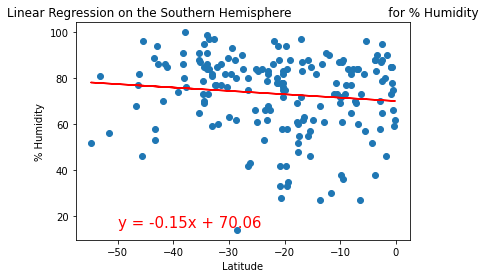

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

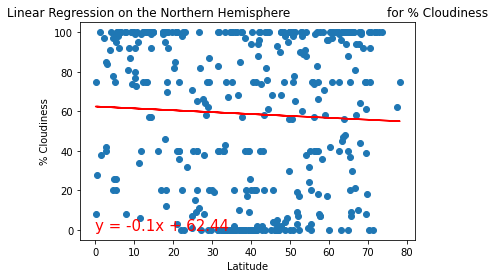

In [61]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,0))

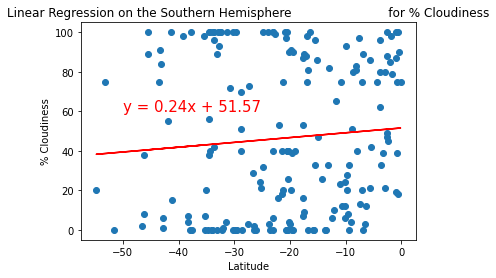

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

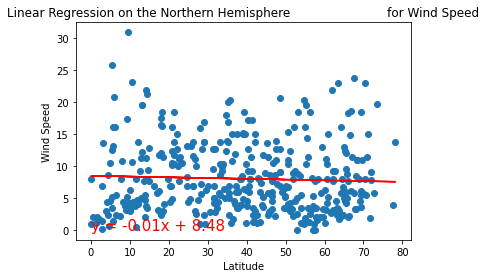

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,0))

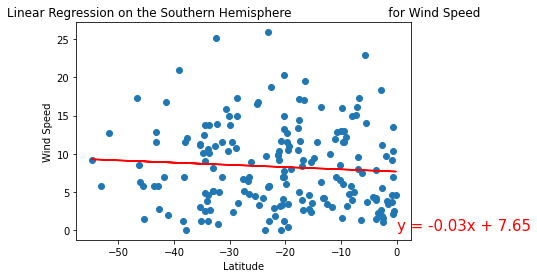

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,0))